In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import Dense, Dropout, Conv2D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [2]:
from keras.datasets import cifar10
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
xtrain = xtrain.reshape(xtrain.shape[0], 32*32*3)
xtest = xtest.reshape(xtest.shape[0], 32*32*3)

In [4]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 3072), (50000, 1), (10000, 3072), (10000, 1))

In [5]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [6]:
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

In [7]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072, ), activation='sigmoid'))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='CategoricalCrossentropy', optimizer=SGD(), metrics=['accuracy'] )

In [9]:
H = model.fit(xtrain, ytrain, validation_data=[xtest, ytest], epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 13s 16ms/step - loss: 2.2609 - accuracy: 0.1629 - val_loss: 2.2129 - val_accuracy: 0.1890
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 2.1623 - accuracy: 0.2347 - val_loss: 2.1119 - val_accuracy: 0.2507
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 2.0739 - accuracy: 0.2695 - val_loss: 2.0376 - val_accuracy: 0.2809
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 2.0112 - accuracy: 0.2875 - val_loss: 1.9955 - val_accuracy: 0.2944
Epoch 5/10
782/782 [==============================] - 11s 15ms/step - loss: 1.9680 - accuracy: 0.3021 - val_loss: 1.9563 - val_accuracy: 0.3010
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.9367 - accuracy: 0.3149 - val_loss: 1.9178 - val_accuracy: 0.3332
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 1.9139 - accuracy: 0.3242 - val_loss: 1.9063 - val_accuracy:

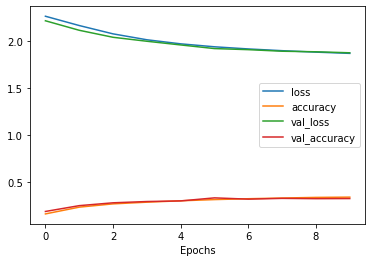

In [10]:
plt.figure()
plt.plot(np.arange(0,10), H.history['loss'], label='loss')
plt.plot(np.arange(0,10), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0,10), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,10), H.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.legend()

In [11]:
pred = model.predict(xtest)
print(classification_report(ytest.argmax(axis=1),pred.argmax(axis=1)))

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.48      0.35      0.40      1000
           1       0.34      0.47      0.39      1000
           2       0.29      0.09      0.14      1000
           3       0.18      0.55      0.27      1000
           4       0.41      0.11      0.17      1000
           5       0.48      0.22      0.30      1000
           6       0.38      0.22      0.28      1000
           7       0.34      0.32      0.33      1000
           8       0.40      0.53      0.46      1000
           9       0.43      0.42      0.42      1000

    accuracy                           0.33     10000
   macro avg       0.37      0.33      0.32     10000
weighted avg       0.37      0.33      0.32     10000

